# Multicollinearity


In [46]:
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline  #it is  called as magic command 
# use jupyter notebooks to display matplotlib plots directly within the notebook

UsageError: unrecognized arguments: #it is called as magic command


In [6]:
df = pd.read_csv("train.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [7]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,2010-01-13 08:13:14.0000007,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [10]:
df.shape

(50000, 8)

In [11]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [13]:
num = ["int64","float64" ] # wants only those dtypes 
num_vars = list(df.select_dtypes(include = num))
num_vars

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [14]:
df = df[num_vars] # select and keep only the columns specified in the list num_vars from the DataFrame df 

In [15]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2


In [16]:
df.info() # it only takes the selected columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        50000 non-null  float64
 1   pickup_longitude   50000 non-null  float64
 2   pickup_latitude    50000 non-null  float64
 3   dropoff_longitude  50000 non-null  float64
 4   dropoff_latitude   50000 non-null  float64
 5   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


In [17]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
df.dropna(inplace = True) # removing all the missing values


C:\Users\suyash\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [20]:
X= df.iloc[:,1:37]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [21]:
y = df.iloc[:,-1]
y

0        1
1        1
2        2
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    2
49999    1
Name: passenger_count, Length: 50000, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 130)

# # finding  correlation

In [24]:
corrmatrix =  X_train.corr() #calculates the correlation matrix for the DataFrame X_train
#The value ranges from -1 to 1, where:

#1 indicates a perfect positive correlation
#-1 indicates a perfect negative correlation
#0 indicates no correlation

In [25]:
corrmatrix #here we got the correlation among the column

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
pickup_longitude,1.000000,-0.934577,0.960161,-0.948330,-0.002090
pickup_latitude,-0.934577,1.000000,-0.900207,0.921704,-0.000904
dropoff_longitude,0.960161,-0.900207,1.000000,-0.977867,-0.002077
dropoff_latitude,-0.948330,0.921704,-0.977867,1.000000,-0.000454
passenger_count,-0.002090,-0.000904,-0.002077,-0.000454,1.000000


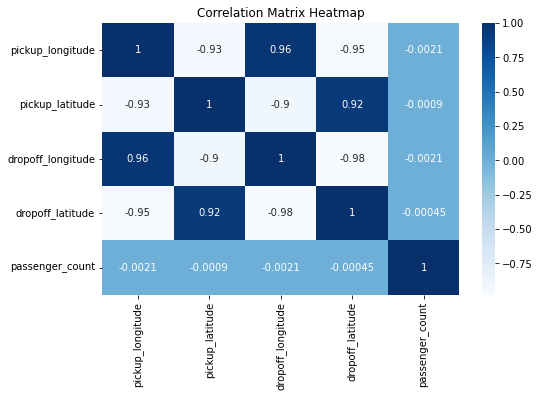

In [43]:
#Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corrmatrix, cmap='Blues', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
correlation(X_train, 0.5) 


{'dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'}

In [31]:
corr_feature = correlation(X_train, 0.5)

In [32]:
corr_feature

{'dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'}

In [33]:
X_train.shape, X_test.shape

((35000, 5), (15000, 5))

In [34]:
X_train.drop(labels = corr_feature, axis = 1, inplace = True) 

C:\Users\suyash\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
X_test.drop(labels = corr_feature, axis =1, inplace = True)

In [36]:
X_train.shape, X_test.shape  #remove the highly correlated features

((35000, 2), (15000, 2))

In [47]:
#Train the model

model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
#make prediction on test_data
y_pred = model.predict(X_test)

In [51]:
y_pred

array([1., 1., 5., ..., 1., 1., 1.])

In [54]:
#Evaluate the model

#1. mse :
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

#2.r2 score :
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

#3.mae :
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 2.092203510848942e-32
R-squared: 1.0
Mean Absolute Error (MAE): 3.0533107222673836e-17


In [61]:
# Perform cross-validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mean = -cv_scores.mean()

print(f'Cross-Validation Mean Squared Error: {cv_mean}')


Cross-Validation Mean Squared Error: 7.032495844618534e-31


In [55]:
# Print model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-1.75929371e-18  1.00000000e+00]
Model Intercept: 0.0


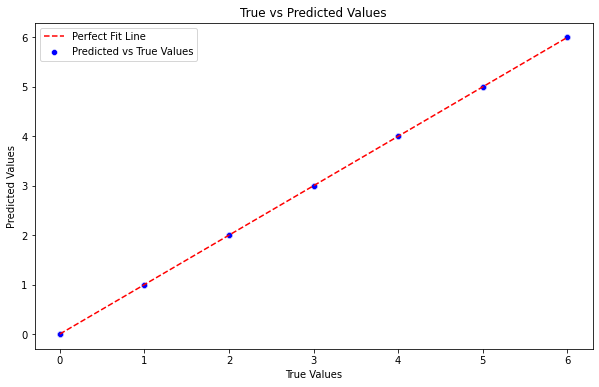

In [56]:
#Visualize the result

# Scatter plot of True vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted vs True Values', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

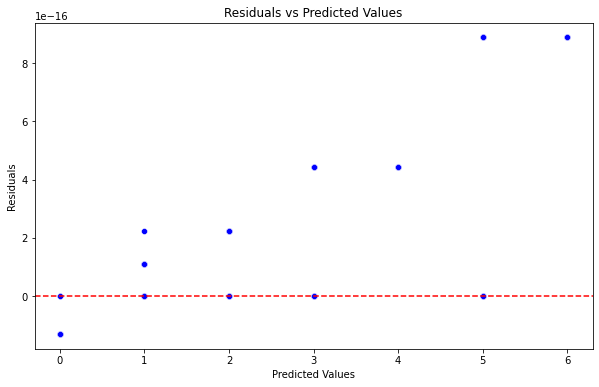

In [57]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


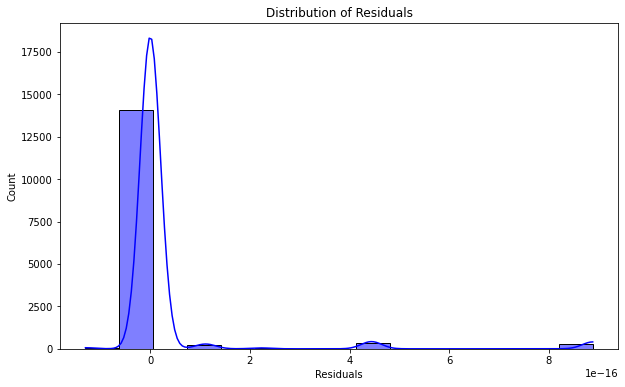

In [58]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


C:\Users\suyash\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\suyash\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 720x432 with 0 Axes>

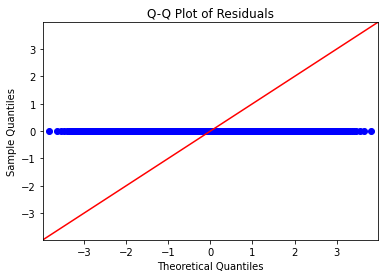

In [59]:
# Q-Q Plot
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', color='blue')
plt.title('Q-Q Plot of Residuals')
plt.show()

Cross-Validation Mean Squared Error: 7.032495844618534e-31
